# Лабороторная работа №3
## Терешин А.В. 20ИВТ3
## Вариант №47
## 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).



In [1]:
import copy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn as sk
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  precision_recall_curve, average_precision_score, plot_precision_recall_curve, plot_roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
wine_df_original = pd.read_csv('winequality-white.csv', sep = ';')
wine_df = copy.copy(wine_df_original)
wine_df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:

wine_df.rename(columns = {'fixed acidity' : 'фиксированная кислотность', 
                           'volatile acidity' : 'летучая кислотность',
                           'citric acid' : 'лимонная кислота',
                           'residual sugar' : 'остаточный сахар',
                           'chlorides' : 'хлориды',
                           'free sulfur dioxide' : 'свободный диоксид серы',
                           'total sulfur dioxide' : 'общий диоксид серы',
                          'density' : 'плотность',
                          'pH' : 'кислотность среды',
                          'sulphates' : 'сульфаты',
                          'alcohol' : 'алкоголь',
                          'quality' : 'качество'}, inplace = True) 

wine_df

,фиксированная кислотность,летучая кислотность,лимонная кислота,остаточный сахар,хлориды,свободный диоксид серы,общий диоксид серы,плотность,кислотность среды,сульфаты,алкоголь,качество
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## 2.	Удалите дубликаты строк в наборе данных

In [4]:
wine_df.dropna()
wine_df.drop_duplicates(keep = 'first', inplace = True)
wine_df.reset_index(drop = True, inplace = True)
wine_df

,фиксированная кислотность,летучая кислотность,лимонная кислота,остаточный сахар,хлориды,свободный диоксид серы,общий диоксид серы,плотность,кислотность среды,сульфаты,алкоголь,качество
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3956,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
3957,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
3958,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
3959,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## 3.	Оцените сбалансированность данных по классам (постройте гистограмму). 

<AxesSubplot:xlabel='качество', ylabel='count'>

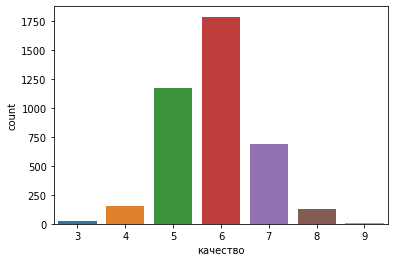

In [5]:
sns.countplot(x = 'качество', data = wine_df)

In [6]:
wine_df_for_knn = copy.copy(wine_df)

wine_df.loc[wine_df.качество < 6, 'качество'] = 0
wine_df.loc[wine_df.качество > 6, 'качество'] = 2
wine_df.loc[wine_df.качество == 6, 'качество'] = 1

wine_df = wine_df.loc[(wine_df.качество != 1) | (wine_df.качество.index > 1000)]
wine_df.reset_index(drop = True, inplace = True)

<AxesSubplot:xlabel='качество', ylabel='count'>

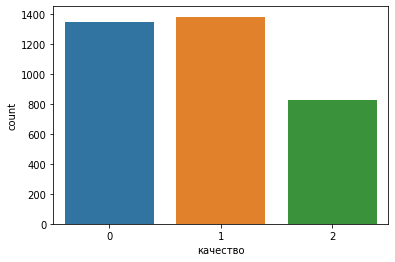

In [7]:
sns.countplot(x = 'качество', data = wine_df)

## 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. 

<AxesSubplot:>

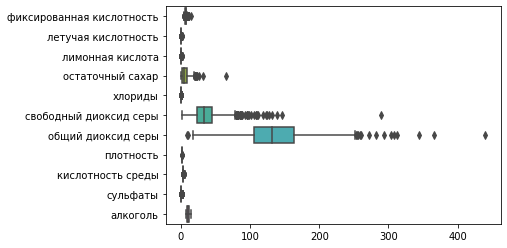

In [8]:
wine_for_scale = wine_df.drop('качество', axis = 1)
wine_df_for_knn_scaled = wine_df_for_knn.drop('качество', axis = 1)

sns.boxplot(data = wine_for_scale, orient = 'h')

<AxesSubplot:>

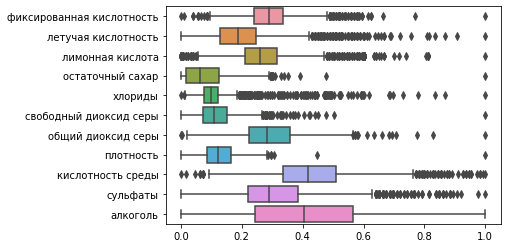

In [9]:
names1 = wine_for_scale.columns

scaler = MinMaxScaler()
d = scaler.fit_transform(wine_for_scale)

scaled_df = pd.DataFrame(d, columns=names1)

sns.boxplot(data = scaled_df, orient = 'h')

In [10]:
scaled_df['качество'] = wine_df.качество
scaled_df

,фиксированная кислотность,летучая кислотность,лимонная кислота,остаточный сахар,хлориды,свободный диоксид серы,общий диоксид серы,плотность,кислотность среды,сульфаты,алкоголь,качество
0,0.413462,0.186275,0.333333,0.013037,0.071217,0.031359,0.125290,0.071139,0.245455,0.395349,0.645161,0
1,0.461538,0.147059,0.325203,0.055215,0.077151,0.052265,0.232019,0.146327,0.381818,0.360465,0.274194,0
2,0.394231,0.098039,0.300813,0.009202,0.091988,0.048780,0.153132,0.094274,0.418182,0.476744,0.451613,0
3,0.269231,0.078431,0.325203,0.013804,0.103858,0.160279,0.310905,0.078851,0.745455,0.348837,0.709677,2
4,0.432692,0.333333,0.504065,0.286043,0.091988,0.135889,0.378190,0.252362,0.236364,0.523256,0.274194,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3550,0.230769,0.127451,0.235772,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129,1
3551,0.269231,0.235294,0.292683,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065,0
3552,0.259615,0.156863,0.154472,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806,1
3553,0.163462,0.205882,0.243902,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194,2


## 5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

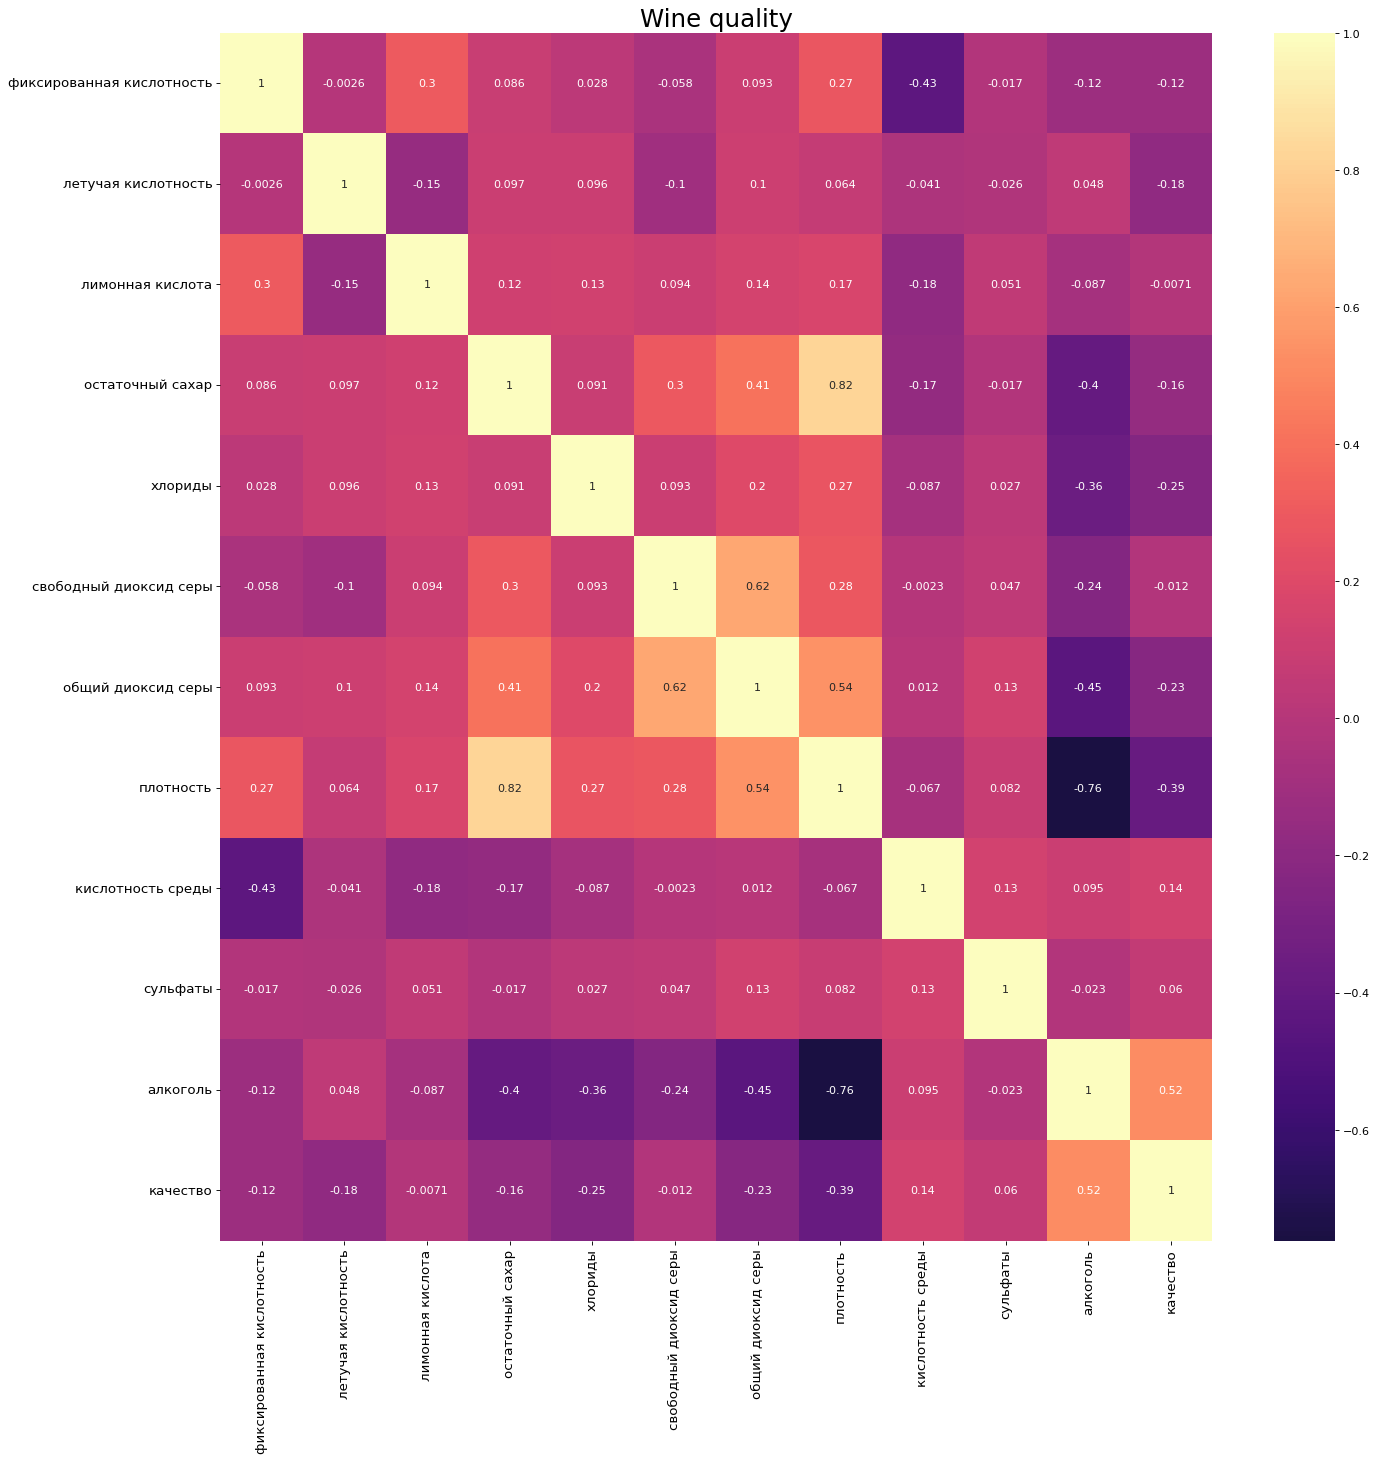

In [11]:
plt.figure(figsize=(20,20), dpi= 80)
sns.heatmap(scaled_df.corr(), xticklabels=scaled_df.corr().columns, yticklabels=scaled_df.corr().columns, cmap='magma', center=0, annot=True)


plt.title('Wine quality', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [12]:
non_corr_df = scaled_df.drop('остаточный сахар', axis = 1)
non_corr_df = non_corr_df.drop('плотность', axis = 1)
non_corr_df = non_corr_df.drop('свободный диоксид серы', axis = 1)
non_corr_df = non_corr_df.drop('лимонная кислота', axis = 1)

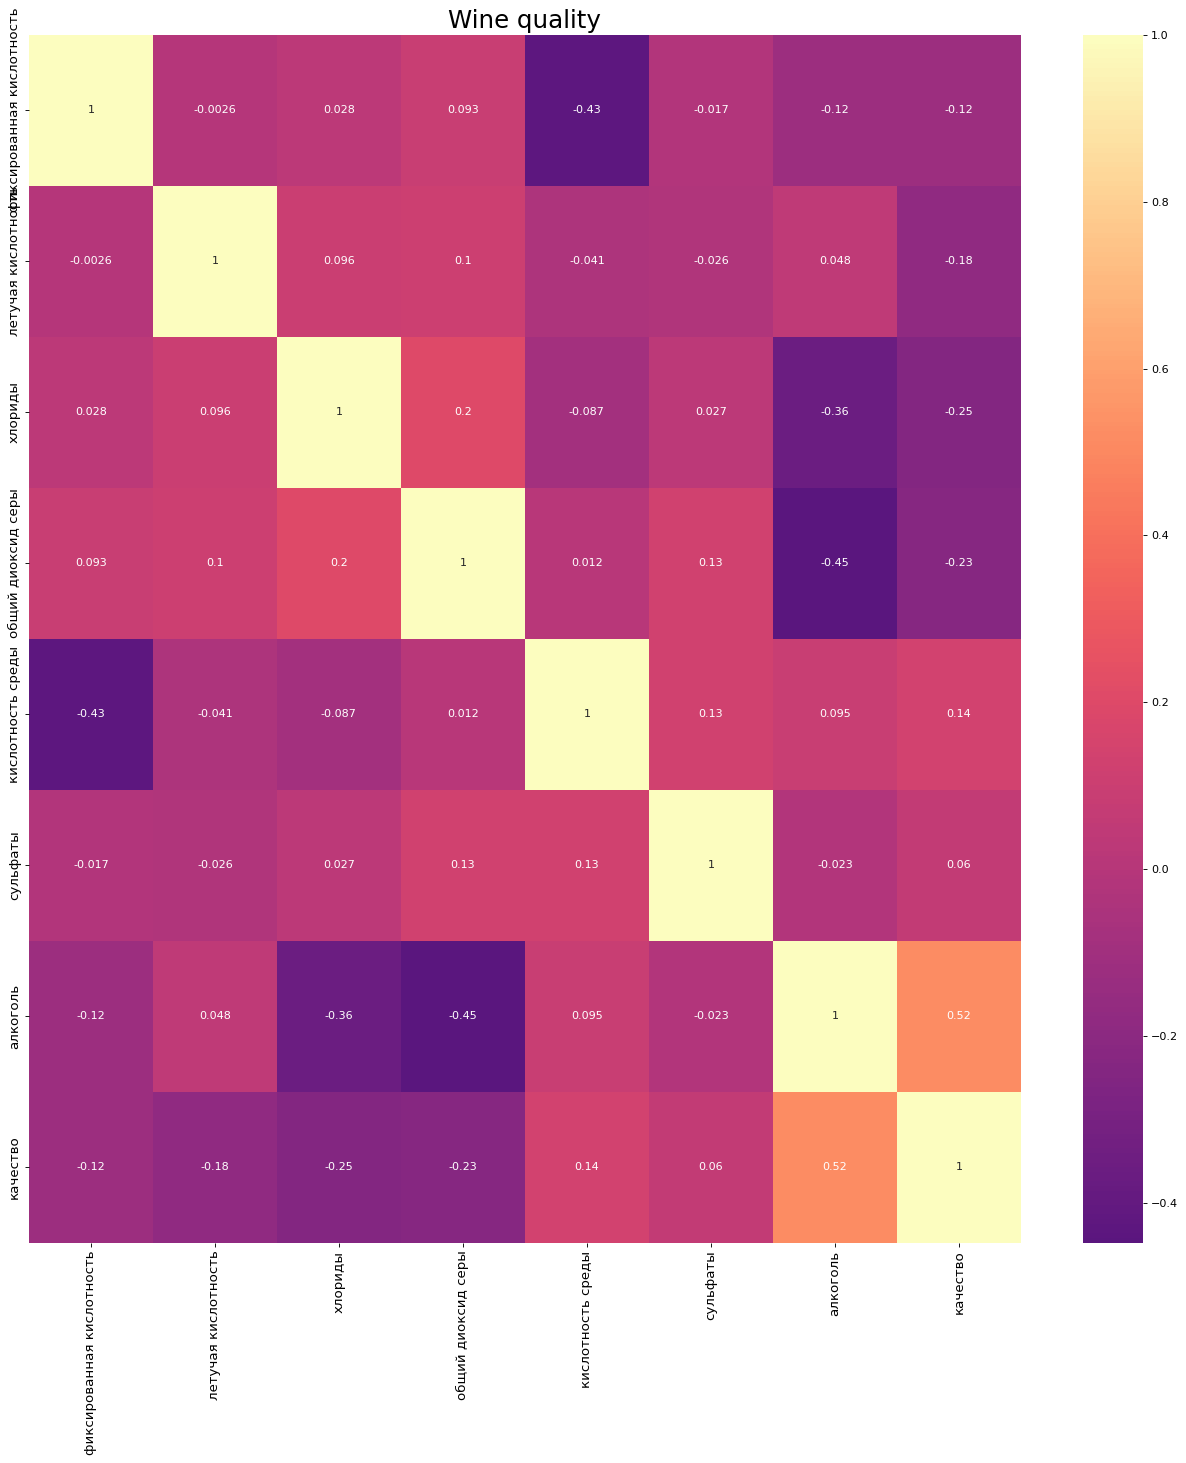

In [13]:
plt.figure(figsize=(20,20), dpi= 80)
sns.heatmap(non_corr_df.corr(), xticklabels=non_corr_df.corr().columns, yticklabels=non_corr_df.corr().columns, cmap='magma', center=0, annot=True)


plt.title('Wine quality', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 6.	Заполните пропущенные значения в данных


In [14]:
non_corr_df.isnull().sum()

фиксированная кислотность    0
летучая кислотность          0
хлориды                      0
общий диоксид серы           0
кислотность среды            0
сульфаты                     0
алкоголь                     0
качество                     0
dtype: int64

## 7. Решите поставленную задачу классификации в соответствии с заданием.

In [15]:
x1 = non_corr_df.drop(columns=['качество'], axis=1)
y1 = non_corr_df['качество']
                    
x2 = scaled_df.drop(columns=['качество'], axis=1)
y2 = scaled_df['качество']

y = label_binarize(y1, classes=[0,1,2] )
n_classes = y.shape[1]

yy= label_binarize(y2, classes=[0,1,2] )

In [16]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.3, random_state = 0)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, yy, test_size = 0.3, random_state = 0)

## Линейный классификатор (персептрон)

In [17]:
p = Perceptron()
pclf = OneVsRestClassifier(p, n_jobs= -1)

parameters = {
    "estimator__max_iter":[x for x in range(1, 50)],
    "estimator__alpha":  np.linspace(0, 1, 20)[1:],
    "estimator__penalty":['l1', 'l2']}

model_tunning = GridSearchCV(pclf, param_grid = parameters, n_jobs = -1)
model_tunning.fit(x1_train, y1_train)

print(model_tunning.best_score_)
print(model_tunning.best_params_)

0.407560220762325
{'estimator__alpha': 0.3157894736842105, 'estimator__max_iter': 3, 'estimator__penalty': 'l2'}


In [18]:
p = Perceptron(alpha = 0.3157894736842105, max_iter = 3, penalty = 'l2')
pclf = OneVsRestClassifier(p, n_jobs= -1)
y_score = pclf.fit(x1_train, y1_train).decision_function(x1_test)
print(pclf.score(x1_test, y1_test))

0.38331771321462044


In [19]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ =  roc_curve(y1_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

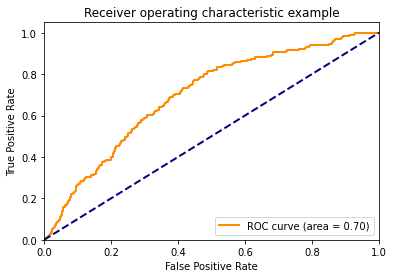

In [20]:
pnum = 2
plt.figure()
lw = 2
plt.plot(
    fpr[pnum],
    tpr[pnum],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

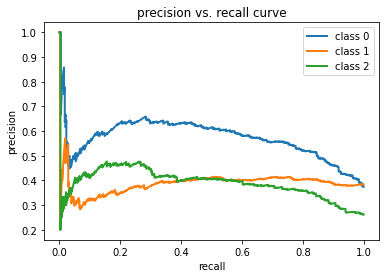

In [21]:
precision = dict()
recall = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y1_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

## KNN

In [22]:
kclf = KNeighborsClassifier()
parameters = {'n_neighbors':[x for x in range(1, 500)],
              'metric': ['euclidean', 'manhattan', 'chebyshev'],
              'weights' : ['distance', 'uniform']}


search = GridSearchCV(cv = 4, estimator=kclf, param_grid = parameters, n_jobs= -1)
search.fit(x2_train, y2_train)
print(search.best_params_)
print(search.best_score_)

KeyboardInterrupt: 

In [ ]:
kclf = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 13, weights = 'distance')
kclf.fit(x2_train, y2_train)
print(kclf.score(x2_test, y2_test))

In [ ]:
#y_score = kclf.predict_proba(x2_test)
y_score = kclf.predict(x2_test)
precision = dict()
recall = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y2_test[:, i], y_score[:,i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [ ]:
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y2_test[:, i],
                                  y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()